In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('sign_mnist.csv')

In [3]:
labels = data['label'].values

In [4]:
unique_val = np.array(labels)
np.unique(unique_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<Axes: ylabel='count'>

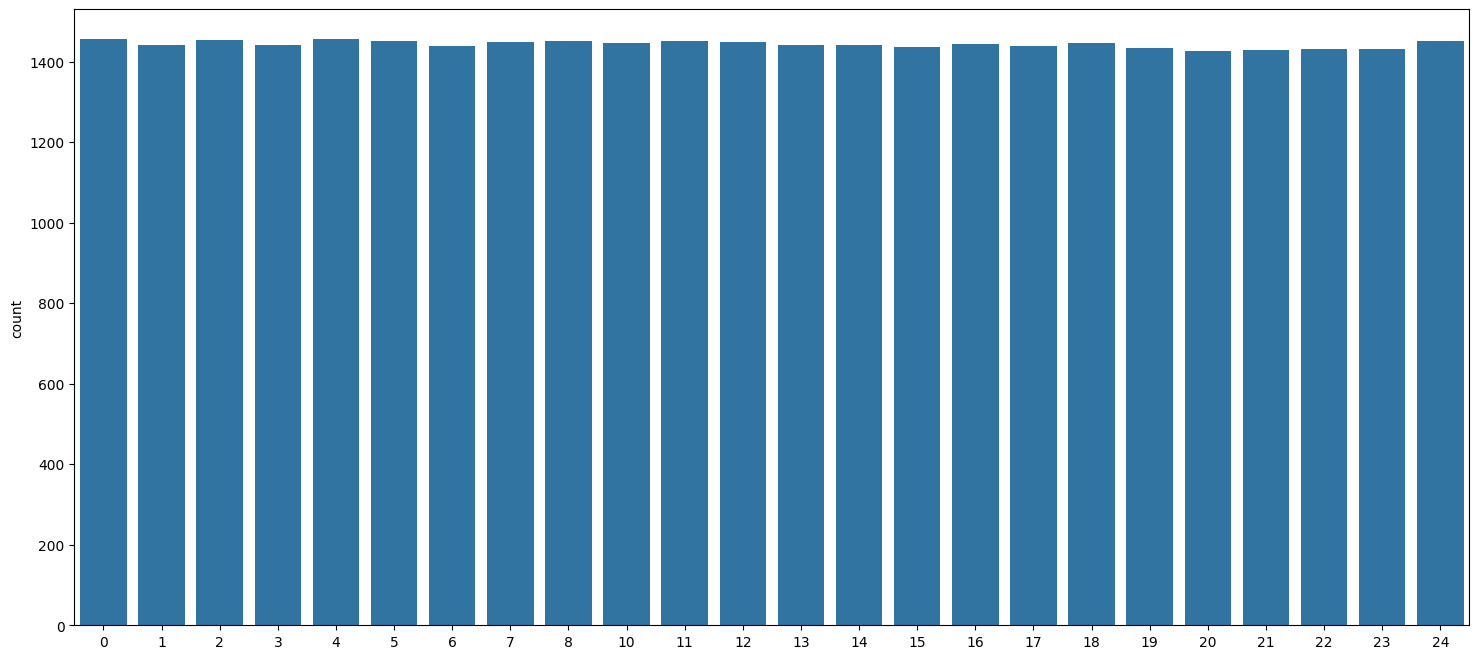

In [5]:
plt.figure(figsize = (18,8))
sns.countplot(x = labels)

In [6]:
data.drop('label', axis = 1, inplace = True)

In [7]:
images = data.values
images = np.array([np.reshape(i, (28, 28))for i in images])
images = np.array([i.flatten()for i in images])

In [8]:
from sklearn.preprocessing import LabelBinarizer
Label_binarizer = LabelBinarizer()
labels = Label_binarizer.fit_transform(labels)

In [9]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


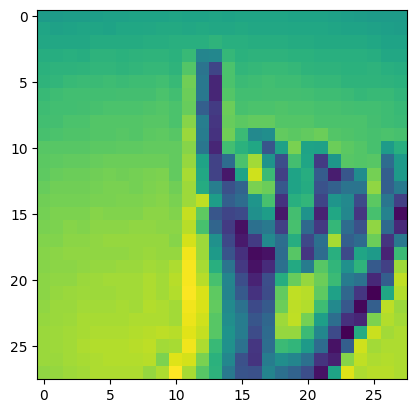

In [10]:
index = 6
print(labels[index])
plt.imshow(images[index].reshape(28, 28))

In [11]:
import cv2

for i in range(0,10):
  rand = np.random.randint(0, len(images))
  input_im = images[rand]
  
  sample = input_im.reshape(28, 28).astype(np.uint8)
  sample = cv2.resize(sample, None, fx = 10, fy = 10, interpolation = cv2.INTER_CUBIC)
  cv2.imshow('sample image', sample)
  cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size = 0.25, random_state = 42)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 24
epochs = 16

In [14]:
X_train = X_train/255
X_test = X_test/255

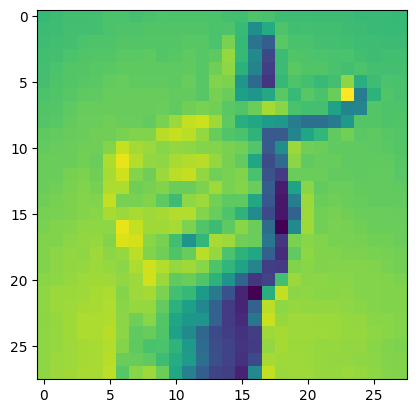

In [15]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0],28, 28, 1)

plt.imshow(X_train[0].reshape(28, 28))

In [16]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28,28,1) ))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes, activation = 'softmax'))

C:\Users\ammus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['accuracy'])

In [18]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 24)                  │           3,096 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 85,912 (335.59 KB)

 Trainable params: 85,912 (335.59 KB)

 Non-trainable params: 0 (0.00 B)

None


In [19]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/16
203/203 ━━━━━━━━━━━━━━━━━━━━ 29s 128ms/step - accuracy: 0.1491 - loss: 2.8394 - val_accuracy: 0.6344 - val_loss: 1.1769
Epoch 2/16
203/203 ━━━━━━━━━━━━━━━━━━━━ 26s 126ms/step - accuracy: 0.6280 - loss: 1.0994 - val_accuracy: 0.7940 - val_loss: 0.6177
Epoch 3/16
203/203 ━━━━━━━━━━━━━━━━━━━━ 25s 122ms/step - accuracy: 0.7871 - loss: 0.6225 - val_accuracy: 0.8985 - val_loss: 0.3383
Epoch 4/16
203/203 ━━━━━━━━━━━━━━━━━━━━ 25s 123ms/step - accuracy: 0.8720 - loss: 0.3796 - val_accuracy: 0.9392 - val_loss: 0.2122
Epoch 5/16
203/203 ━━━━━━━━━━━━━━━━━━━━ 25s 123ms/step - accuracy: 0.9214 - loss: 0.2448 - val_accuracy: 0.9760 - val_loss: 0.1133
Epoch 6/16
203/203 ━━━━━━━━━━━━━━━━━━━━ 25s 123ms/step - accuracy: 0.9495 - loss: 0.1584 - val_accuracy: 0.9838 - val_loss: 0.0740
Epoch 7/16
203/203 ━━━━━━━━━━━━━━━━━━━━ 25s 123ms/step - accuracy: 0.9730 - loss: 0.0965 - val_accuracy: 0.9934 - val_loss: 0.0401
Epoch 8/16
203/203 ━━━━━━━━━━━━━━━━━━━━ 25s 121ms/step - accuracy: 0.9811 - loss: 0

In [21]:
model.save('sign_mnist_cnn_50_Epochs.h5')
print("Model Saved")

Model Saved


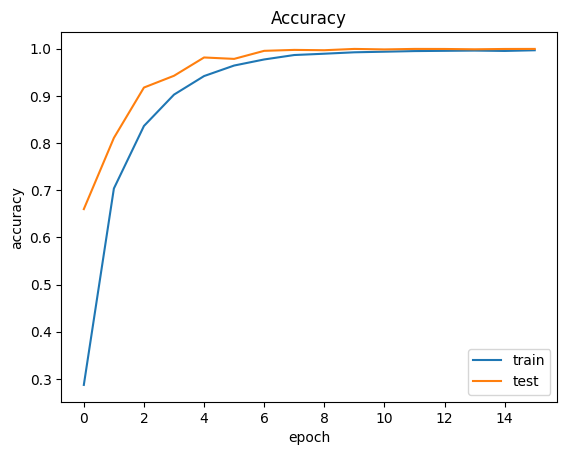

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [23]:
test_images = data.values
test_images = np.array([np.reshape(i, (28, 28)) for i in test_images])
test_images = np.array([i.flatten() for i in test_images])
test_labels = Label_binarizer.fit_transform(labels)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)
test_images.shape
y_pred = model.predict(test_images)

1083/1083 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step


In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels, y_pred.round())

0.992635804430069